# Preprocessing

### 1. Import library

In [9]:
import pandas as pd
import re
import emoji
import time
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load and process data

✓ NLTK stopwords downloaded successfully
Loading dataset...
✓ Dataset loaded successfully with 225002 rows

Initial dataset information:
Shape: (225002, 5)
Columns: ['userName', 'content', 'score', 'at', 'appVersion']

Sample data:
                  userName  \
0                Yuga Edit   
1                 ff burik   
2  Anisa Suci Rahmayuliani   

                                                                                               content  \
0                                                                              akun gopay saya di blok   
1                                            Lambat sekali sekarang ini bosssku apk gojek gk kaya dulu   
2  Kenapa sih dari kemarin sy buka aplikasi gojek malah keluar sendiri terus Saya kasih bintang 2 d...   

   score                   at appVersion  
0      1  2022-01-21 10:52:12      4.9.3  
1      3  2021-11-30 15:40:38      4.9.3  
2      4  2021-11-29 22:58:12      4.9.3  

1. Performing sentiment labeling...

Sentiment di

C:\Users\bimag\AppData\Local\Temp\ipykernel_21620\2171094019.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


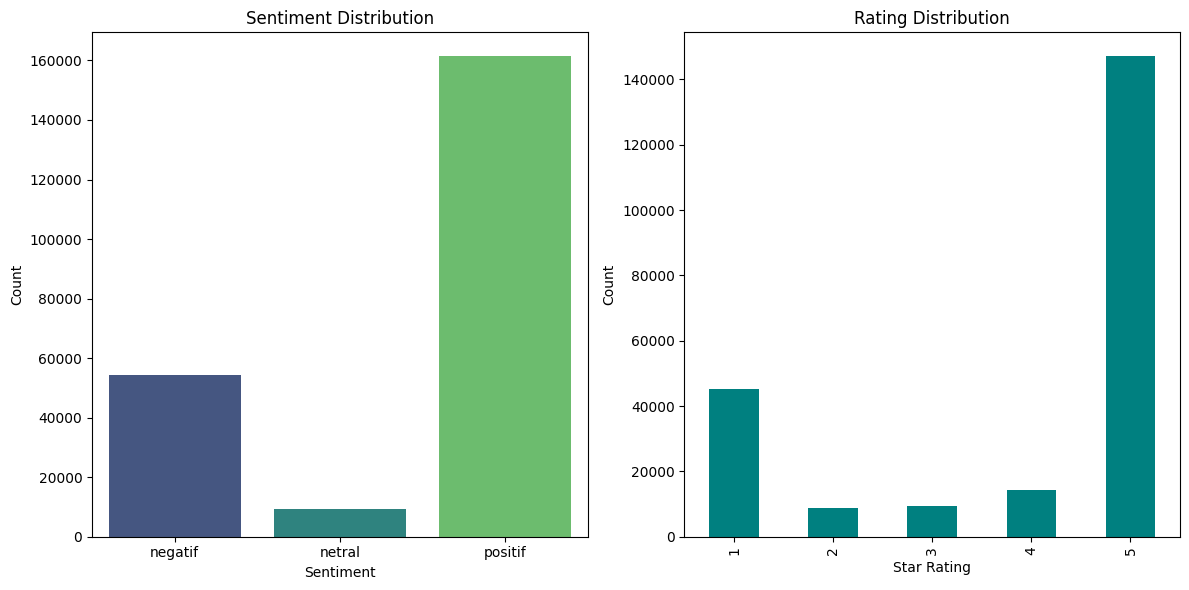

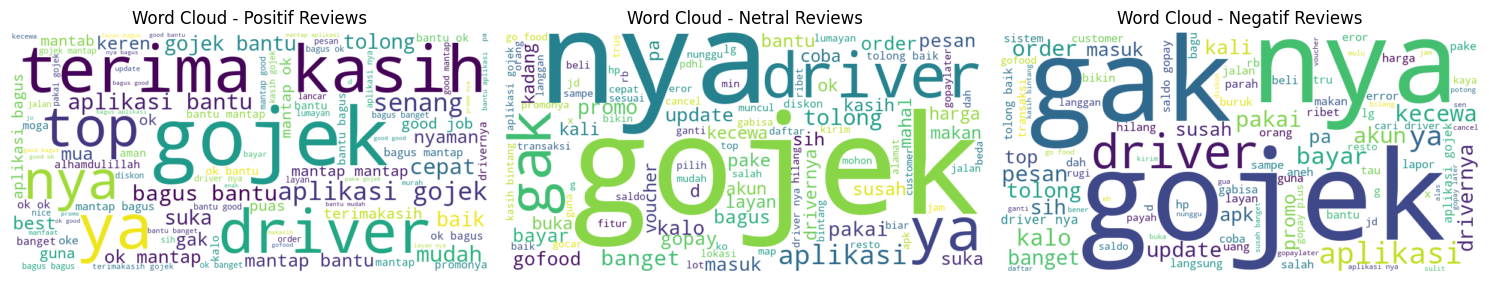


Preparing final dataset for saving...

Saving processed dataset...
✓ Processed dataset saved with timestamp: data/GojekAppReview_Processed_20250526_160217.csv
✓ Processed dataset also saved as: data/GojekAppReview_Processed.csv
✓ Complete processed dataset (with all preprocessing steps) saved as: data/GojekAppReview_Processed_Full.csv

Final dataset preview (requested format):
                  userName  \
0                Yuga Edit   
1                 ff burik   
2  Anisa Suci Rahmayuliani   
3             naoki yakuza   
4            Trio Sugianto   

                                                                                               content  \
0                                                                              akun gopay saya di blok   
1                                            Lambat sekali sekarang ini bosssku apk gojek gk kaya dulu   
2  Kenapa sih dari kemarin sy buka aplikasi gojek malah keluar sendiri terus Saya kasih bintang 2 d...   
3  Baru downlo

In [15]:
# Set pandas display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Start timing
start_time = time.time()

# Download required NLTK resources
print("Downloading NLTK resources...")
try:
    nltk.download('stopwords', quiet=True)
    print("✓ NLTK stopwords downloaded successfully")
except Exception as e:
    print(f"Error downloading NLTK resources: {e}")

# Load the dataset
try:
    print("Loading dataset...")
    file_path = "DATA/GojekAppReview_1.csv"
    df = pd.read_csv(file_path)
    print(f"✓ Dataset loaded successfully with {len(df)} rows")
except Exception as e:
    print(f"Error loading dataset: {e}")
    raise

# Display initial dataset info
print("\nInitial dataset information:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nSample data:")
print(df.head(3))

# 1. SENTIMENT LABELING
print("\n1. Performing sentiment labeling...")

def label_sentiment(score):
    """Label reviews based on their score"""
    if score >= 4:
        return 'positif'
    elif score == 3:
        return 'netral'
    else:
        return 'negatif'

df['sentiment'] = df['score'].apply(label_sentiment)

# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print(f"\nSentiment distribution:\n{sentiment_counts}")

# 2. TEXT CLEANING
print("\n2. Cleaning text...")

def clean_text(text):
    """Clean the text"""
    if not isinstance(text, str):
        return ""
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Replace emojis with empty string
    try:
        text = emoji.replace_emoji(text, replace='')
    except:
        pass
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    
    # Strip leading and trailing spaces
    text = text.strip()
    
    # Convert to lowercase
    return text.lower()

# Apply text cleaning
print("Processing text cleaning...")
df['cleaned_content'] = df['content'].apply(clean_text)

# 3. WORD NORMALIZATION
print("\n3. Normalizing text...")

# Normalization dictionary (same as original)
normalization_dict = {
    # Basic conversions
    "gk": "gak", "ga": "gak", "tdk": "tidak", "bgt": "banget", "dr": "dari",
    "udh": "sudah", "jg": "juga", "aja": "saja", "sy": "saya", "trs": "terus",
    "ngga": "tidak", "nggak": "tidak", "bkin": "bikin", "blm": "belum",
    "sm": "sama", "tp": "tapi", "dgn": "dengan", "krn": "karena",
    
    # Additional common Indonesian slang words
    "yg": "yang", "utk": "untuk", "dg": "dengan", "klo": "kalau", "kok": "kok",
    "gw": "saya", "gue": "saya", "lu": "kamu", "kyk": "seperti", "gmn": "bagaimana",
    "sih": "sih", "deh": "deh", "dpt": "dapat", "bs": "bisa", "sdh": "sudah",
    "ttg": "tentang", "dlm": "dalam", "kl": "kalau", "km": "kamu", "hrs": "harus",
    "mk": "maka", "scr": "secara", "spy": "supaya", "bnyk": "banyak", "slh": "salah",
    "krna": "karena", "mw": "mau", "pk": "pakai", "pke": "pakai", "tq": "terima kasih",
    "thx": "terima kasih", "gpp": "tidak apa-apa", "gampng": "gampang", "bwt": "buat",
    "skrng": "sekarang", "skrg": "sekarang", "msh": "masih", "bnr": "benar",
    "trims": "terima kasih", "gk": "tidak", "gak": "tidak", "udah": "sudah",
    "pgen": "ingin", "pgn": "ingin", "kyk": "seperti", "gitu": "begitu",
    "gini": "begini", "gmana": "bagaimana", "gimana": "bagaimana", "gt": "begitu",
    "yah": "ya", "karna": "karena", "dri": "dari", "tdk": "tidak",
    "knp": "kenapa", "kpn": "kapan", "nih": "ini", "spt": "seperti",
    "ntaps": "mantap", "mantul": "mantap", "mantap": "mantap"
}

def normalize_text(text):
    """Normalize Indonesian informal words"""
    if not isinstance(text, str):
        return ""
    
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Apply normalization
print("Processing text normalization...")
df['normalized_content'] = df['cleaned_content'].apply(normalize_text)

# 4. TOKENIZATION AND STOPWORD REMOVAL
print("\n4. Tokenizing and removing stopwords...")

# Get Indonesian stopwords
stop_words = set(stopwords.words('indonesian'))

# Add custom stopwords
custom_stopwords = {"yang", "dengan", "pada", "untuk", "dari", "di", "ke", "dan", "atau", "ini", "itu"}
stop_words.update(custom_stopwords)

def tokenize_and_remove_stopwords(text):
    """Tokenize text and remove stopwords"""
    if not isinstance(text, str):
        return ""
    
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Apply tokenization
print("Processing tokenization and stopword removal...")
df['tokenized_content'] = df['normalized_content'].apply(tokenize_and_remove_stopwords)

# 5. STEMMING
print("\n5. Stemming text...")

# Create Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    """Apply stemming to text using Sastrawi stemmer"""
    if not isinstance(text, str):
        return ""
    return stemmer.stem(text)

# Apply stemming
print("Processing stemming...")
df['stemmed_content'] = df['tokenized_content'].apply(stem_text)

# SAVE PROCESSED DATASET
print("\nSaving processed dataset...")
output_file_path = "DATA/GojekAppReview_Processed.csv"

try:
    df.to_csv(output_file_path, index=False)
    print(f"✓ Processed dataset saved to {output_file_path}")
except Exception as e:
    print(f"Error saving dataset: {e}")

# DISPLAY FINAL RESULTS
print("\nFinal dataset preview:")
final_columns = ['userName', 'content', 'score', 'at', 'appVersion', 'sentiment', 
                 'cleaned_content', 'normalized_content', 'tokenized_content', 'stemmed_content']
print(df[final_columns].head())

# Display a sample of processing steps for a single review
print("\nProcessing steps example for a single review:")
sample_idx = 0
print(f"Original:    {df.iloc[sample_idx]['content']}")
print(f"Cleaned:     {df.iloc[sample_idx]['cleaned_content']}")
print(f"Normalized:  {df.iloc[sample_idx]['normalized_content']}")
print(f"Tokenized:   {df.iloc[sample_idx]['tokenized_content']}")
print(f"Stemmed:     {df.iloc[sample_idx]['stemmed_content']}")
print(f"Sentiment:   {df.iloc[sample_idx]['sentiment']}")

# Calculate and display processing time
end_time = time.time()
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time:.2f} seconds")

# Optional: Data visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['score'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Optional: Word clouds for each sentiment
try:
    from wordcloud import WordCloud
    
    plt.figure(figsize=(15, 12))
    
    for i, sentiment in enumerate(['positif', 'netral', 'negatif']):
        plt.subplot(1, 3, i+1)
        
        # Combine all stemmed content for the sentiment
        text = ' '.join(df[df['sentiment'] == sentiment]['stemmed_content'].dropna())
        
        if text:
            wordcloud = WordCloud(width=800, height=400, background_color='white', 
                                  max_words=100, contour_width=3, contour_color='steelblue').generate(text)
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title(f'Word Cloud - {sentiment.capitalize()} Reviews')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()
except ImportError:
    print("Note: WordCloud not installed. To visualize word clouds, install with: pip install wordcloud")


    # PREPARE FINAL DATASET FOR SAVING
print("\nPreparing final dataset for saving...")

# Rename sentiment column to match requested format
df = df.rename(columns={'sentiment': 'sentimenLabel'})

# Select columns for the final output as requested
final_output_columns = ['userName', 'content', 'score', 'at', 'appVersion', 'sentimenLabel']
final_df = df[final_output_columns].copy()

# Create 'data' directory if it doesn't exist
import os
if not os.path.exists('data'):
    os.makedirs('data')
    print("✓ Created 'data' directory")

# Add timestamp to filename to avoid overwriting
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_file_path = f"data/GojekAppReview_Processed_{timestamp}.csv"

# Also save a copy with a standard name for easy reference
standard_output_path = "data/GojekAppReview_Processed.csv"

# SAVE PROCESSED DATASET
print("\nSaving processed dataset...")

try:
    # Save timestamped version
    final_df.to_csv(output_file_path, index=False)
    print(f"✓ Processed dataset saved with timestamp: {output_file_path}")
    
    # Save standard version
    final_df.to_csv(standard_output_path, index=False)
    print(f"✓ Processed dataset also saved as: {standard_output_path}")
    
    # Save full processed version with all preprocessing columns
    full_output_path = "data/GojekAppReview_Processed_Full.csv"
    df.to_csv(full_output_path, index=False)
    print(f"✓ Complete processed dataset (with all preprocessing steps) saved as: {full_output_path}")
    
except Exception as e:
    print(f"Error saving dataset: {e}")

# Display final results
print("\nFinal dataset preview (requested format):")
print(final_df.head())

# Summary statistics
print("\nDataset summary:")
print(f"Total reviews: {len(final_df)}")
sentiment_counts = final_df['sentimenLabel'].value_counts()
print(f"Sentiment distribution: {dict(sentiment_counts)}")

# Calculate and display processing time
end_time = time.time()
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time:.2f} seconds")

# Training

### 1. Import Library

In [17]:
# Sentiment Analysis with LSTM and SVM Models
# ===============================================

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import pickle
import joblib

# Word2Vec
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

### 2. Training Model

All libraries imported successfully!
Data loaded successfully!
Dataset shape: (225002, 10)

First 5 rows:
                  userName  \
0                Yuga Edit   
1                 ff burik   
2  Anisa Suci Rahmayuliani   
3             naoki yakuza   
4            Trio Sugianto   

                                                                                               content  \
0                                                                              akun gopay saya di blok   
1                                            Lambat sekali sekarang ini bosssku apk gojek gk kaya dulu   
2  Kenapa sih dari kemarin sy buka aplikasi gojek malah keluar sendiri terus Saya kasih bintang 2 d...   
3  Baru download gojek dan hape baru trus ditop u gopay transaksi dialfamart transaksi bloked trans...   
4                                                                                               Mantap   

   score                   at appVersion sentimenLabel  \
0      1  2022-01-

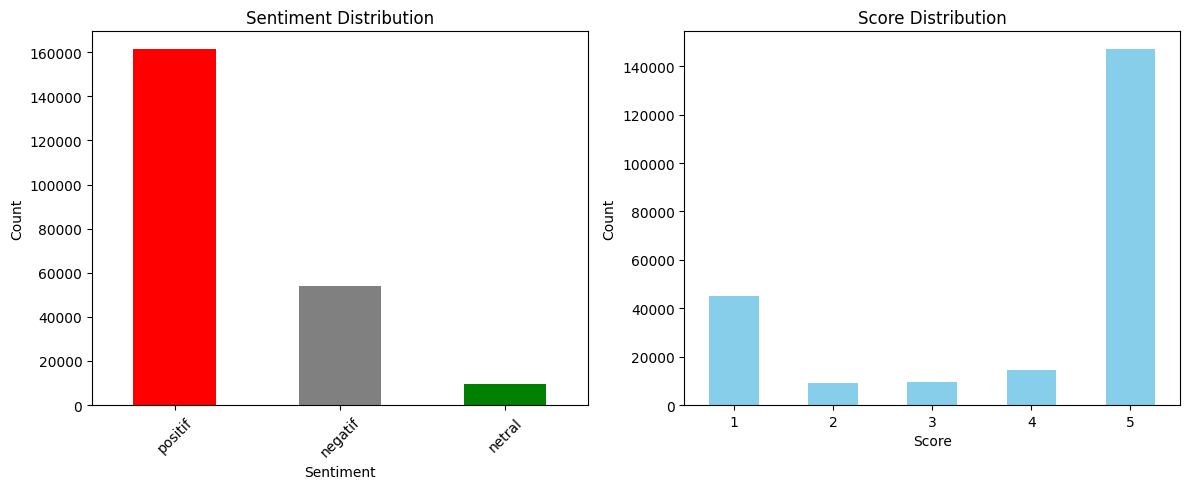


DATA PREPROCESSING
Using column: normalized_content
Label mapping: {'negatif': 0, 'netral': 1, 'positif': 2}
Text samples: 225002
Unique labels: 3

Train set size: 180001
Test set size: 45001

SVM MODEL WITH TF-IDF
Creating TF-IDF features...
TF-IDF feature shape: (180001, 5000)
Training SVM model...

SVM Model Evaluation:
Accuracy: 0.8941
Precision: 0.8830
Recall: 0.8941
F1-Score: 0.8769

LSTM MODEL WITH WORD2VEC
Preparing text for Word2Vec...
Training Word2Vec model...
Word2Vec vocabulary size: 59515
Tokenizing text for LSTM...
Padded sequence shape: (180001, 100)
Embedding matrix created!
Building LSTM model...
LSTM Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     6,175,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,175,000 (23.56 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,175,000 (23.56 MB)

Training LSTM model...
Epoch 1/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 201s 44ms/step - accuracy: 0.7147 - loss: 0.7021 - val_accuracy: 0.7168 - val_loss: 0.7015
Epoch 2/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 198s 44ms/step - accuracy: 0.7156 - loss: 0.7071 - val_accuracy: 0.7168 - val_loss: 0.7091
Epoch 3/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 198s 44ms/step - accuracy: 0.7177 - loss: 0.7074 - val_accuracy: 0.7168 - val_loss: 0.6872
Epoch 4/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 198s 44ms/step - accuracy: 0.7172 - loss: 0.6407 - val_accuracy: 0.8563 - val_loss: 0.4017
Epoch 5/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 209s 47ms/step - accuracy: 0.8627 - loss: 0.4142 - val_accuracy: 0.8873 - val_loss: 0.3595
Epoch 6/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 211s 47ms/step - accuracy: 0.8783 - loss: 0.3846 - val_accuracy: 0.8904 - val_loss: 0.3387
Epoch 7/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 212s 47ms/step - accuracy: 0.8817 - loss: 0.3647 - val_accuracy: 0.8924 - val_loss: 0.3317
Epoch 8/10
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 213s

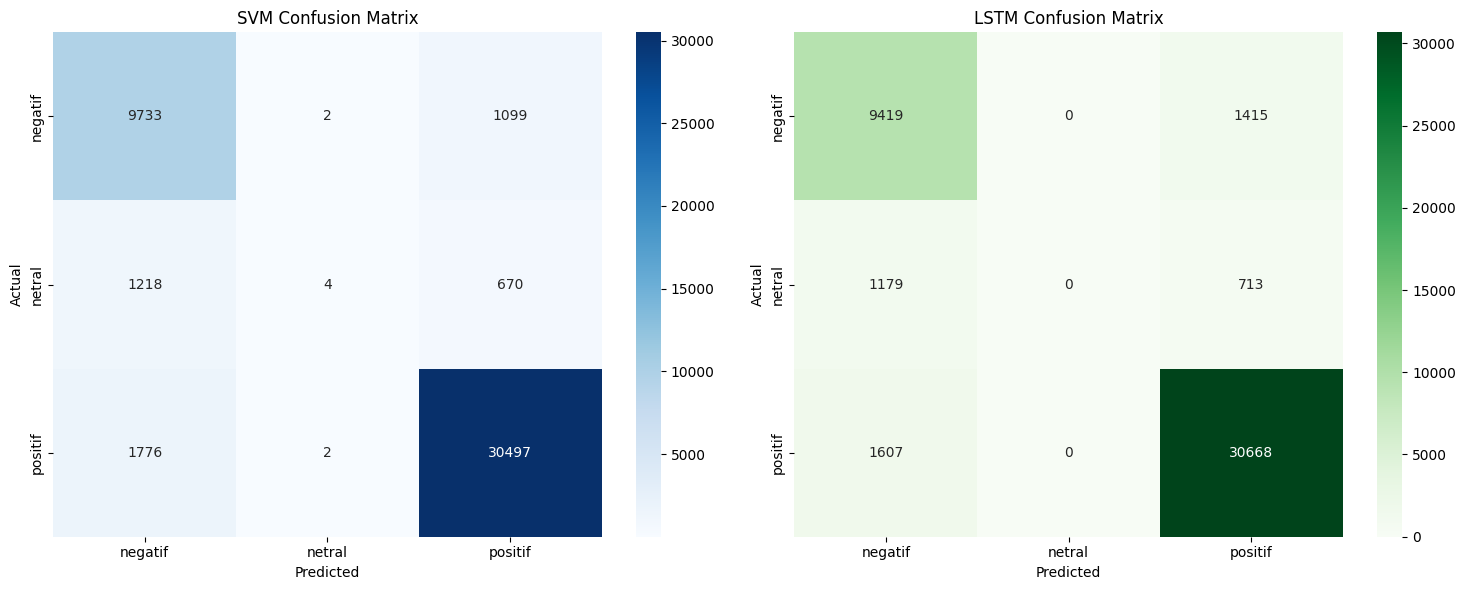


MODEL COMPARISON

Model Comparison:
  Model  Accuracy  Precision  Recall  F1-Score  CV_Mean  CV_Std
0   SVM    0.8941     0.8830  0.8941    0.8769   0.8943  0.0009
1  LSTM    0.8908     0.8565  0.8908    0.8729   0.7482  0.0620


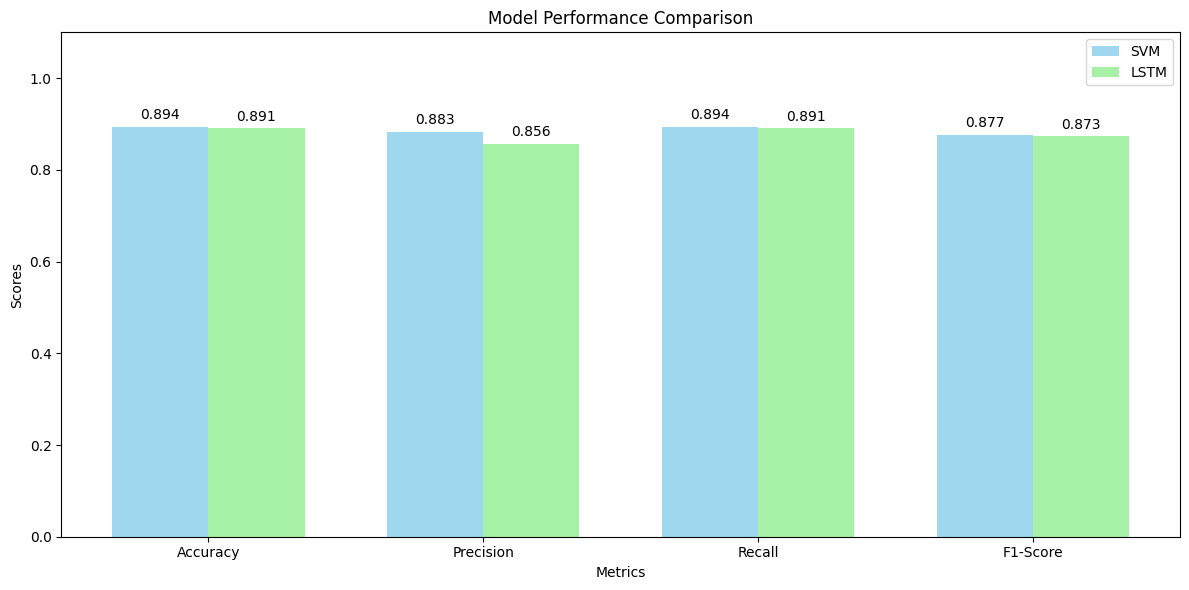

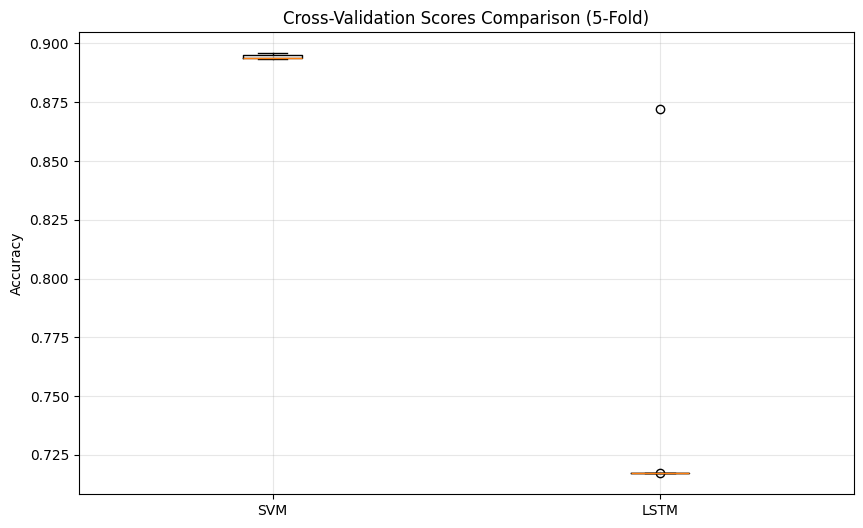


MODEL EXPORT
✅ SVM model and TF-IDF vectorizer saved!


✅ LSTM model saved!
✅ All components saved successfully!

Saved files:
- svm_sentiment_model.pkl (SVM model)
- tfidf_vectorizer.pkl (TF-IDF vectorizer)
- lstm_sentiment_model.h5 (LSTM model)
- lstm_tokenizer.pkl (LSTM tokenizer)
- label_encoder.pkl (Label encoder)
- word2vec_model.model (Word2Vec model)
- model_config.pkl (Configuration)

MODEL INFERENCE TESTING
Testing both models on sample reviews:
------------------------------------------------------------

Sample 1: 'Aplikasi sangat bagus dan mudah digunakan'
SVM Prediction: positif
LSTM Prediction: positif (confidence: 0.987)
------------------------------------------------------------

Sample 2: 'Pelayanan buruk sekali tidak memuaskan'
SVM Prediction: negatif
LSTM Prediction: negatif (confidence: 0.905)
------------------------------------------------------------

Sample 3: 'Biasa saja tidak ada yang istimewa'
SVM Prediction: negatif
LSTM Prediction: positif (confidence: 0.492)
---------------------------------------------------

In [18]:
print("All libraries imported successfully!")

# ===============================================
# 1. DATA LOADING AND EXPLORATION
# ===============================================

# Load the data
try:
    df = pd.read_csv('./DATA/GojekAppReview_Processed_Full.csv')
    print("Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
except Exception as e:
    print(f"Error loading data: {e}")

# Data exploration
print("\n" + "="*50)
print("DATA EXPLORATION")
print("="*50)

print(f"\nDataset Info:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

print(f"\nSentiment Distribution:")
print(df['sentimenLabel'].value_counts())

print(f"\nScore Distribution:")
print(df['score'].value_counts().sort_index())

# Visualize sentiment distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['sentimenLabel'].value_counts().plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['score'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# ===============================================
# 2. DATA PREPROCESSING
# ===============================================

print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Use normalized_content for training (if available), otherwise use cleaned_content
text_column = 'normalized_content' if 'normalized_content' in df.columns else 'cleaned_content'
if text_column not in df.columns:
    text_column = 'content'

print(f"Using column: {text_column}")

# Prepare the data
X = df[text_column].astype(str)
y = df['sentimenLabel']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Label mapping: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")
print(f"Text samples: {len(X)}")
print(f"Unique labels: {len(np.unique(y_encoded))}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTrain set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# ===============================================
# 3. SVM MODEL WITH TF-IDF
# ===============================================

print("\n" + "="*50)
print("SVM MODEL WITH TF-IDF")
print("="*50)

# TF-IDF Vectorization
print("Creating TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words=None,  # Since we're working with Indonesian text
    min_df=2,
    max_df=0.8
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF feature shape: {X_train_tfidf.shape}")

# Train SVM model
print("Training SVM model...")
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# SVM Predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# SVM Evaluation
print("\nSVM Model Evaluation:")
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")

# ===============================================
# 4. LSTM MODEL WITH WORD2VEC
# ===============================================

print("\n" + "="*50)
print("LSTM MODEL WITH WORD2VEC")
print("="*50)

# Prepare text for Word2Vec
print("Preparing text for Word2Vec...")
sentences = [simple_preprocess(text) for text in X_train]

# Train Word2Vec model
print("Training Word2Vec model...")
w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    sg=0  # CBOW
)

print(f"Word2Vec vocabulary size: {len(w2v_model.wv.key_to_index)}")

# Tokenization for LSTM
print("Tokenizing text for LSTM...")
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

print(f"Padded sequence shape: {X_train_pad.shape}")

# Create embedding matrix using Word2Vec
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv.key_to_index:
        embedding_matrix[i] = w2v_model.wv[word]

print("Embedding matrix created!")

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=len(np.unique(y_encoded)))
y_test_cat = to_categorical(y_test, num_classes=len(np.unique(y_encoded)))

# Build LSTM model
print("Building LSTM model...")
lstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], 
              input_length=max_length, trainable=False),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

lstm_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("LSTM Model Architecture:")
lstm_model.summary()

# Train LSTM model
print("Training LSTM model...")
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = lstm_model.fit(
    X_train_pad, y_train_cat,
    batch_size=32,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# LSTM Predictions
print("Making LSTM predictions...")
y_pred_lstm_prob = lstm_model.predict(X_test_pad)
y_pred_lstm = np.argmax(y_pred_lstm_prob, axis=1)

# LSTM Evaluation
print("\nLSTM Model Evaluation:")
lstm_accuracy = accuracy_score(y_test, y_pred_lstm)
lstm_precision = precision_score(y_test, y_pred_lstm, average='weighted')
lstm_recall = recall_score(y_test, y_pred_lstm, average='weighted')
lstm_f1 = f1_score(y_test, y_pred_lstm, average='weighted')

print(f"Accuracy: {lstm_accuracy:.4f}")
print(f"Precision: {lstm_precision:.4f}")
print(f"Recall: {lstm_recall:.4f}")
print(f"F1-Score: {lstm_f1:.4f}")

# ===============================================
# 5. CROSS-VALIDATION (5-FOLD)
# ===============================================

print("\n" + "="*50)
print("CROSS-VALIDATION (5-FOLD)")
print("="*50)

# SVM Cross-validation
print("Performing SVM 5-fold cross-validation...")
cv_folds = 5
skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

# For SVM - we need to fit TF-IDF on full training data for CV
X_full_tfidf = tfidf_vectorizer.fit_transform(X)
svm_cv_scores = cross_val_score(svm_model, X_full_tfidf, y_encoded, cv=skf, scoring='accuracy')

print(f"SVM CV Scores: {svm_cv_scores}")
print(f"SVM CV Mean: {svm_cv_scores.mean():.4f} (+/- {svm_cv_scores.std() * 2:.4f})")

# For LSTM, we'll do manual cross-validation due to complexity
print("\nPerforming LSTM 5-fold cross-validation...")
lstm_cv_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y_encoded)):
    print(f"Fold {fold + 1}/{cv_folds}")
    
    X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
    y_fold_train, y_fold_val = y_encoded[train_idx], y_encoded[val_idx]
    
    # Tokenize and pad for this fold
    fold_tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
    fold_tokenizer.fit_on_texts(X_fold_train)
    
    X_fold_train_seq = fold_tokenizer.texts_to_sequences(X_fold_train)
    X_fold_val_seq = fold_tokenizer.texts_to_sequences(X_fold_val)
    
    X_fold_train_pad = pad_sequences(X_fold_train_seq, maxlen=max_length, padding='post')
    X_fold_val_pad = pad_sequences(X_fold_val_seq, maxlen=max_length, padding='post')
    
    y_fold_train_cat = to_categorical(y_fold_train, num_classes=len(np.unique(y_encoded)))
    
    # Build and train model for this fold
    fold_model = Sequential([
        Embedding(len(fold_tokenizer.word_index) + 1, 50, input_length=max_length),
        SpatialDropout1D(0.2),
        LSTM(50, dropout=0.2, recurrent_dropout=0.2),
        Dense(25, activation='relu'),
        Dropout(0.5),
        Dense(len(np.unique(y_encoded)), activation='softmax')
    ])
    
    fold_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    fold_model.fit(X_fold_train_pad, y_fold_train_cat, epochs=5, batch_size=32, verbose=0)
    
    # Evaluate
    y_fold_pred_prob = fold_model.predict(X_fold_val_pad, verbose=0)
    y_fold_pred = np.argmax(y_fold_pred_prob, axis=1)
    
    fold_accuracy = accuracy_score(y_fold_val, y_fold_pred)
    lstm_cv_scores.append(fold_accuracy)
    print(f"Fold {fold + 1} Accuracy: {fold_accuracy:.4f}")

lstm_cv_scores = np.array(lstm_cv_scores)
print(f"\nLSTM CV Scores: {lstm_cv_scores}")
print(f"LSTM CV Mean: {lstm_cv_scores.mean():.4f} (+/- {lstm_cv_scores.std() * 2:.4f})")

# ===============================================
# 6. VISUALIZATION - CONFUSION MATRICES
# ===============================================

print("\n" + "="*50)
print("CONFUSION MATRICES")
print("="*50)

# Create confusion matrices
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_lstm = confusion_matrix(y_test, y_pred_lstm)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# SVM Confusion Matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# LSTM Confusion Matrix
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title('LSTM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ===============================================
# 7. MODEL COMPARISON
# ===============================================

print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

# Create comparison dataframe
comparison_data = {
    'Model': ['SVM', 'LSTM'],
    'Accuracy': [svm_accuracy, lstm_accuracy],
    'Precision': [svm_precision, lstm_precision],
    'Recall': [svm_recall, lstm_recall],
    'F1-Score': [svm_f1, lstm_f1],
    'CV_Mean': [svm_cv_scores.mean(), lstm_cv_scores.mean()],
    'CV_Std': [svm_cv_scores.std(), lstm_cv_scores.std()]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison:")
print(comparison_df.round(4))

# Visualize comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]
lstm_scores = [lstm_accuracy, lstm_precision, lstm_recall, lstm_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, svm_scores, width, label='SVM', color='skyblue', alpha=0.8)
ax.bar(x + width/2, lstm_scores, width, label='LSTM', color='lightgreen', alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1.1)

# Add value labels on bars
for i, v in enumerate(svm_scores):
    ax.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
for i, v in enumerate(lstm_scores):
    ax.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Cross-validation comparison
plt.figure(figsize=(10, 6))
plt.boxplot([svm_cv_scores, lstm_cv_scores], labels=['SVM', 'LSTM'])
plt.title('Cross-Validation Scores Comparison (5-Fold)')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.show()

# ===============================================
# 8. MODEL EXPORT
# ===============================================

print("\n" + "="*50)
print("MODEL EXPORT")
print("="*50)

try:
    # Save SVM model and TF-IDF vectorizer
    joblib.dump(svm_model, 'svm_sentiment_model.pkl')
    joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
    print("✅ SVM model and TF-IDF vectorizer saved!")
    
    # Save LSTM model
    lstm_model.save('lstm_sentiment_model.h5')
    print("✅ LSTM model saved!")
    
    # Save tokenizer and other components
    with open('lstm_tokenizer.pkl', 'wb') as f:
        pickle.dump(tokenizer, f)
    
    with open('label_encoder.pkl', 'wb') as f:
        pickle.dump(label_encoder, f)
    
    # Save Word2Vec model
    w2v_model.save('word2vec_model.model')
    
    # Save configuration
    config = {
        'max_length': max_length,
        'embedding_dim': embedding_dim,
        'vocab_size': vocab_size,
        'num_classes': len(np.unique(y_encoded))
    }
    
    with open('model_config.pkl', 'wb') as f:
        pickle.dump(config, f)
    
    print("✅ All components saved successfully!")
    
    print("\nSaved files:")
    print("- svm_sentiment_model.pkl (SVM model)")
    print("- tfidf_vectorizer.pkl (TF-IDF vectorizer)")
    print("- lstm_sentiment_model.h5 (LSTM model)")
    print("- lstm_tokenizer.pkl (LSTM tokenizer)")
    print("- label_encoder.pkl (Label encoder)")
    print("- word2vec_model.model (Word2Vec model)")
    print("- model_config.pkl (Configuration)")
    
except Exception as e:
    print(f"Error saving models: {e}")

# ===============================================
# 9. INFERENCE TESTING
# ===============================================

print("\n" + "="*50)
print("MODEL INFERENCE TESTING")
print("="*50)

# Sample reviews for testing
sample_reviews = [
    "Aplikasi sangat bagus dan mudah digunakan",
    "Pelayanan buruk sekali tidak memuaskan",
    "Biasa saja tidak ada yang istimewa",
    "Gopay sering error dan lambat",
    "Sangat puas dengan layanan gojek"
]

print("Testing both models on sample reviews:")
print("-" * 60)

for i, review in enumerate(sample_reviews, 1):
    print(f"\nSample {i}: '{review}'")
    
    # SVM Prediction
    try:
        review_tfidf = tfidf_vectorizer.transform([review])
        svm_pred = svm_model.predict(review_tfidf)[0]
        svm_sentiment = label_encoder.inverse_transform([svm_pred])[0]
        print(f"SVM Prediction: {svm_sentiment}")
    except Exception as e:
        print(f"SVM Error: {e}")
    
    # LSTM Prediction
    try:
        review_seq = tokenizer.texts_to_sequences([review])
        review_pad = pad_sequences(review_seq, maxlen=max_length, padding='post')
        lstm_pred_prob = lstm_model.predict(review_pad, verbose=0)
        lstm_pred = np.argmax(lstm_pred_prob, axis=1)[0]
        lstm_sentiment = label_encoder.inverse_transform([lstm_pred])[0]
        lstm_confidence = np.max(lstm_pred_prob)
        print(f"LSTM Prediction: {lstm_sentiment} (confidence: {lstm_confidence:.3f})")
    except Exception as e:
        print(f"LSTM Error: {e}")
    
    print("-" * 60)

# ===============================================
# 10. SUMMARY AND RECOMMENDATIONS
# ===============================================

print("\n" + "="*50)
print("SUMMARY AND RECOMMENDATIONS")
print("="*50)

print(f"""
FINAL RESULTS SUMMARY:
======================

SVM Model (with TF-IDF):
- Accuracy: {svm_accuracy:.4f}
- F1-Score: {svm_f1:.4f}
- CV Mean: {svm_cv_scores.mean():.4f} ± {svm_cv_scores.std():.4f}

LSTM Model (with Word2Vec):
- Accuracy: {lstm_accuracy:.4f}
- F1-Score: {lstm_f1:.4f}
- CV Mean: {lstm_cv_scores.mean():.4f} ± {lstm_cv_scores.std():.4f}

RECOMMENDATIONS:
================
""")

if svm_accuracy > lstm_accuracy:
    print("🏆 SVM model performed better overall")
    print("✅ Recommended for deployment: SVM")
    print("📊 SVM tends to work well with smaller datasets and TF-IDF features")
else:
    print("🏆 LSTM model performed better overall")
    print("✅ Recommended for deployment: LSTM")
    print("📊 LSTM can capture sequential patterns and context better")

print(f"""
NEXT STEPS:
===========
1. Use the exported models for production deployment
2. Consider collecting more data to improve performance
3. Fine-tune hyperparameters for better results
4. Implement real-time prediction API using saved models
5. Monitor model performance in production

FILES EXPORTED:
===============
All models and preprocessors have been saved and are ready for deployment!
""")

print("\n🎉 Analysis Complete! 🎉")